In [63]:
from matplotlib import pyplot as plt 
import numpy as np 
from math import log, exp, sinh, cosh, log10
from scipy.optimize import bisect 

# Задание 1.

 $$ \varepsilon = 10^{-10} $$

In [10]:
a=0.01
b=3.0
e= 1e-10 

Функция bisec с помощью метода бисекции находит приближенное решение уравнения с заданной точностью  на локализованном отрезке.

In [7]:
def bisec(f, a, b, e):
    an=a
    bn=b 
    k=0 
    while abs(an-bn)>2*e:
        xn = (an+bn)/2
        f_an = f(an)
        f_bn = f(bn)
        f_xn = f(xn)
        if ( f_an*f_xn<=0):
            bn=xn
        else:
            an = xn 
        k+=1        
    xn = (an+bn)/2 #result 
    

    return xn, k
    

Функция Task1 вызывает функцию bisec выбранное число решений. 
Аргмент bisect_use нужен для того,чтобы вызывать метод bisect из scipy в случае корней нечетной кратности. Иначе данный метод не работает. 
Поэтому выставляем значение bisect_use равным False, когда подозреваем корень в нечетной кратности. 
Аргумент bisect_use = True по умолчания. 

In [8]:
def Task1(f, a, b, e, bisect_use=True):
    x = np.linspace(a, b, 100)
    y = np.zeros( 100)
    for i in range(100):
        y[i]= f(x[i])
        
    plt.plot(x, y, '-')
    plt.plot(x, [0 for i in range(100)], '-')
    plt.show()
    local = []
    k= 0 
    print("Сколько решений содержится на заданном отрезке?")
    n=int(input())
    print("\n")
    print("Локализация корней")
    for i in range(n):
        print("Корень ", (i+1))
        print("a=", end =" ")
        a=float(input())
        print("b=", end =" ")
        b=float(input())
        local.append((a, b))
    
    results = []
    scs = []
    for i in range(n):
        xn, k = bisec(f, local[i][0], local[i][1], e)
        print("Результаты для корня ", (i+1))
        print ("результат моего алгоритма: ", xn)
        print("число итераций : ", k)
        if(bisect_use):
            sc = bisect(f, a=local[i][0], b=local[i][1], xtol=e)
            print( "scipy result :", sc)
            scs.append(sc)
        results.append(xn)
        
        
    plt.plot(x, y, '-') 
    plt.plot(x, [0 for i in range(100)], '-')
    plt.plot(results, [0 for i in range(n)], ".") #найденные решения 
        

        

$$ f(x)=0  $$
$$ f(x)= (lg(x))^{2} + \frac {3}{4}\ lg(x) - \frac {1}{4}\ $$

# Аналитическое решение.
При замене q=lg(x) находим q=-1 и q=1/4.
$$ x1 = 0.1 $$
$$ x2 = 10^{ \frac {1}{4}\ }  \approx 1.7782794100389228   $$

Оба корня принадлежат отрезку [0.01, 3 ] 

$$ f'(x) = \frac {8ln(x)+ln(1000)}{4x(ln(10))^{2}}  \  $$ 

$$ f'(x) = 0  \Leftrightarrow x = \frac {1}{10^{ \frac {3}{8}\ }} $$
Отсюда делаем вывод, что оба корня на отрезке [0.01, 3 ] простые и ожидаем хороших результатов. 

In [5]:
def f(x):    
    return (log10(x))**2+3/4*log10(x)-1/4

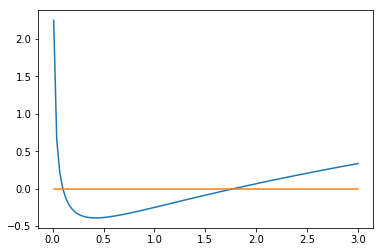

Сколько решений содержится на заданном отрезке?
2


Локализация корней
Корень  1
a= 0.01
b= 0.5
Корень  2
a= 1.5
b= 2.0
Результаты для корня  1
результат моего алгоритма:  0.10000000003841705
число итераций :  32
scipy result : 0.10000000003841704
Результаты для корня  2
результат моего алгоритма:  1.7782794100348838
число итераций :  32
scipy result : 1.7782794100348838


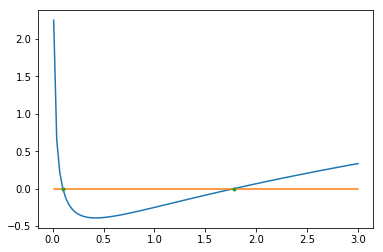

In [11]:

Task1(f, a, b,e, True)

На графике отмечена найденные решения. 
Оба корня найдены с соотвествующей точностью. 
Результат соотвутствует аналитическому решению.

$$ g(x)= (lg(x))^{2} + 2lg(x)+1 $$
$$ g(x)=0  $$

# Аналитическое решение. 
Заменой q=lg(x) получаем q = -1. Отсюда 
 $$ x= \frac{1}{10} \ $$ 
    
$$ g'(x) = \frac {2ln(10x)}{x*(ln(10))^{2}}\ $$
$$ g'(x) = 0  \Leftrightarrow x = \frac {1}{10} $$
$$ g''(x) =  \frac {2-2ln(10x)}{x^{2}*(ln(10))^2}   \  $$
$$ g''(x) = 0  \Leftrightarrow  x = \frac {e}{10}  \  $$

Следовательно, единственный корень, который принадоежит отрезку [0.01, 3 ], не является простым. Кратность корня = 2 (четная кратность). 

Не ждем хороших результатов от метода бисекции, так как он работает для корней нечетной кратности. 

In [13]:
def g(x):
    return (log10(x))**2+2*log10(x)+1 

# Численное решение 

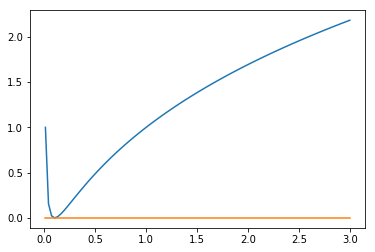

Сколько решений содержится на заданном отрезке?
1


Локализация корней
Корень  1
a= 0.01
b= 0.5
Результаты для корня  1
результат моего алгоритма:  0.4999999999429565
число итераций :  32


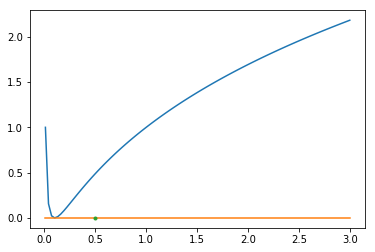

In [14]:
Task1(g, a, b,e, False)

По графику видно, что это решение сильно дальше от истинного корня, расстояние сильно больше заданной точности. 
Результат не сходится с найденным аналитически решением. 
Причина неудачи - искомый корень четной кратности, в то время как метод бисекции следует применять для корней нечетной кратности. 

# Задание 2 

 $$ \varepsilon = 10^{-6} $$
 $$ f(x) = (x+1)e^{x+1} -x -2 $$
 Найти корень наибольший по модулю.

In [38]:
e1= 1e-6
def f_1(x):
    return (x+1)*exp(x+1)-x-2


Сначала изобразим график функции, чтобы локализовать корень, наибольший по модулю, для метода бисекции. 
Метод бисекции был реализован в предыдущем задании.

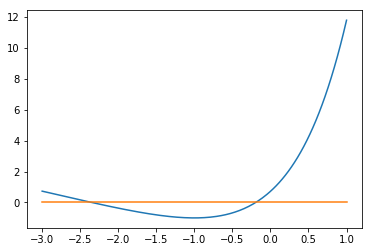

In [24]:
x_2 = np.linspace(-3, 1, 200)
y_2 = np.zeros( 200)
for i in range(len(x_2)):
    y_2[i]= f_1(x_2[i])
plt.plot(x_2, y_2, '-')
plt.plot(x_2, [0 for i in range(len(x_2))], '-')
plt.show()

Уравнение имеет два решения. За пределами изображенного отрезка корней нет.
Наибольший по модулю корень - левый. 
локализуем его следующим образом: 
a = -2.5
b = -2.0


Численное решение методом бисекции: 

In [39]:
a0=-2.5
b0=-2.0
x_sol, k2 =  bisec(f_1, a0, b0, e1)
print("x* : ", x_sol)
print("число итераций : ", k2)

x* :  -2.3499765396118164
число итераций :  18


# Численное решение методом Ньютона 

В методе Ньютона:

$$ x^{(n+1)}= x^{(n)} - \frac {f(x^{(n)})}{f'(x^{(n)})}\  $$ 
$$ f'(x) = e^{x+1}(x+2)-1 $$

$$ x^{(0)} = \frac {a+b}{2} \ $$

Критерий окончания: 

$$ |x^{(n+1)}-x^{(n)}|<\varepsilon  $$ 

In [30]:
def f_1_der(x):
    return exp(x+1)*(x+2)-1

x_init = (a0+b0)/2

In [34]:
def newton(f, f_der,x_init, e):
    """принимает функцию, ее производную, начальное приближение и заданную точность."""
    xn=x_init
    xn1=xn - f(xn)/f_der(xn) #чтобы сделать первую итерацию 
    k=1
    while(abs(xn1-xn)>e):
        xn=xn1
        xn1 = xn - f(xn)/f_der(xn)
    
        k=k+1
    
    return xn1, k
    
    
    

In [40]:
x_n_sol, k_iter = newton(f_1, f_1_der, x_init,e1)
print("x* : ", x_n_sol)
print("число итераций : ", k_iter)

x* :  -2.349976485401126
число итераций :  3


Метод Ньютона выполнил поиск корня с заданной точностью за три итерации,  в то время как для метода бисекции потребовалось 18 итераций.
Это объясняется тем, что метод Ньютона имеет квадратичную сходимость, в то время как метод бисекции сходитося со скоростью геометрической прогрессии со знаменателем 1/2. 

# Задание 3 

$$ \varepsilon = 10^{-5} $$
 $$ f(x) = (x-1)sh(x+1) -x  $$
 $$ f'(x) = sh(x+1)+(x-1)ch(x+1)-1 $$ 

In [2]:
e2= 1e-5
def f_2(x):
    return (x-1)*sinh(x+1)-x

def f_2_der(x):
    return sinh(x+1)+(x-1)*cosh(x+1)-1

Сначала изобразим график функции, чтобы локализовать корни. 

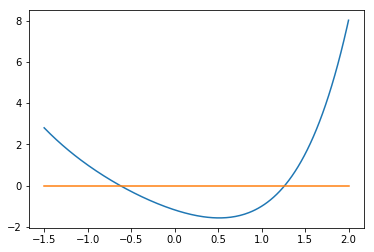

In [46]:
x_3 = np.linspace(-1.5, 2, 200)
y_3= np.zeros( 200)
for i in range(len(x_3)):
    y_3[i]= f_2(x_3[i])
plt.plot(x_3, y_3, '-')
plt.plot(x_3, [0 for i in range(len(x_3))], '-')
plt.show()

По графику видно два корня. За пределами изображенного отрезка корней нет. 
Выберем следующие отрезки локализации:

Для первого корня: [-1.0, -0.5] 

Для второго корня: [1.0, 1.5]

# пункт а 

$$ \varphi(x) = x - \alpha f(x)   $$ 
$$ \alpha = \frac {2}{M+m} \ $$
$$ 0 < m \leqslant f'(x) \leqslant M $$ 
$$ x \in [a, b] $$ 

In [19]:
def find_m_M(f_der, a,b):
    """Возвращает найденные численно минимальное и максимальное значения на заданном отрезке для заданной функции. """
    x = np.linspace(a, b, 200)
    y= np.zeros( 200)
    for i in range(len(x)):
        y[i]= f_der(x[i])
    
    M=np.max(y)
    m=np.min(y)
    return m, M

In [23]:
def simple_itarationsa_1(f, f_der, a, b, e):
    m, M = find_m_M(f_der, a, b)

   
    q = (M-m)/(M+m)
    print("q =", q)
    alpha = 2/(m+M)
    x_n = (a+b)/2
    x_n_1 = x_n-alpha*f(x_n) # первая итерация
    k=1
    while(abs(x_n_1-x_n)>(1-q)/q*e):
        
        x_n=x_n_1
        x_n_1 = x_n-alpha*f(x_n)
        k=k+1
    return x_n_1, k
 

Посмотрим на ситуацию с первым корнем. Для этого посмотрим,какие значения принимает производная функции f на отрезке [-1, 1]. На это отрезке содержится только один рассматриваемый корень 

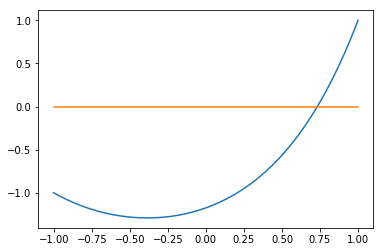

In [24]:
x_der = np.linspace(-1.0, 1.0, 200)
y_der= np.zeros( 200)
for i in range(len(x_3)):
    y_der[i]= f_2(x_der[i])+2*x_der[i]
plt.plot(x_der, y_der, '-')
plt.plot(x_der, [0 for i in range(len(x_3))], '-')
plt.show()

Как видно из графика, производная принмает отрицательные значения в окрестностях искомого корня. Это не удовлетворяет условиям m>0, а следовательно и условиям для  0<q<=1, поэтому нельзя получить результат численного решения с выбранным тождественным преобразованиям. Алгоритм не будет сходиться. 

Найдем второй корень.

In [25]:
x_sol_2, k2 = simple_itarationsa_1(f_2, f_2_der, 1.0, 1.5, e2)
print("x* : ", x_sol_2)
print("число итераций : ", k2)

q = 0.5109728845232769
x* :  1.2655205893862385
число итераций :  4


Результат найден с соответствующей точностью. 

# пункт б 

Рассмотрим сначала следующее преобразование: 
$$ \varphi(x) = x+1/10*(x-1)sh(x+1)   $$ 
$$ \varphi'(x) = 1/10*( sh(x+1)+ (x-1)*cosh(x+1)+9  ) $$ 

In [51]:
def simple_itarationsa_2( f_i, f_i_der, a, b, e):
   
    x = np.linspace(a, b, 200)
    y= np.zeros( 200)
    for i in range(len(x)):
        y[i]= abs(f_i_der(x[i]))
    
    q=np.max(y)

    
    print("q =", q)

    x_n = (a+b)/2
    x_n_1 = f_i(x_n) # первая итерация
    k=1
    while(abs(x_n_1-x_n)>(1-q)/q*e):
        
        x_n=x_n_1
        x_n_1 = x_n_1 = f_i(x_n)
        k=k+1
    return x_n_1, k

In [55]:
def fi_for_f(x):
    return ((x-1)*sinh(x+1)-x)/10+x

def fi_der_for_f(x):
    return (sinh(x+1)+(x-1)*cosh(x+1)+9)*1/10



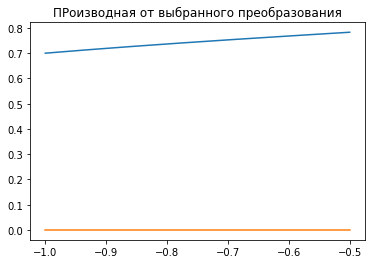

In [56]:
x_der_fi = np.linspace(-1.0, -0.5, 200)
y_der_fi= np.zeros( 200)
for i in range(len(x_3)):
    y_der_fi[i]= fi_der_for_f(x_der_fi[i])
    
plt.title("ПРоизводная от выбранного преобразования")
plt.plot(x_der_fi, y_der_fi, '-')
plt.plot(x_der_fi, [0 for i in range(len(x_3))], '-')
plt.show()

На отрезке  [-1.0, -0.5] (это отрезок локализации первого корня) 𝜑(𝑥) принимает значения по модуля больше нуля и меньше единицы. Значит, выполнены условия сходимости метода. 

In [57]:
x_sol_3, k3 = simple_itarationsa_2(fi_for_f, fi_der_for_f, -1.00, -0.5, e2)
print("x* : ", x_sol_3)
print("число итераций : ", k3)

q = 0.7829656357684176
x* :  -0.6244804172233949
число итераций :  36


Первый корень найден.   
Выбранное ранее преобразование по подойдет по условиям сходимости метода для второго корня, локализованного на  [1.0, 1.5].

Рассмотрим следующее преобразование : 
$$ \varphi(x) = x-1/10*(x-1)sh(x+1)   $$ 
$$ \varphi'(x) = 1/10*( -sh(x+1)- (x-1)*cosh(x+1)+11  ) $$ 

In [58]:
def fi_for_f2(x):
    return -((x-1)*sinh(x+1)-x)/10+x

def fi_der_for_f2(x):
    return (-sinh(x+1)-(x-1)*cosh(x+1)+11)*1/10



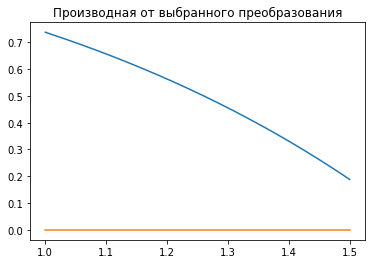

In [60]:
x_der_fi1 = np.linspace(1.0, 1.5, 200)
y_der_fi1= np.zeros( 200)
for i in range(len(x_3)):
    y_der_fi1[i]= fi_der_for_f2(x_der_fi1[i])
    
plt.title("Производная от выбранного преобразования")
plt.plot(x_der_fi1, y_der_fi1, '-')
plt.plot(x_der_fi1, [0 for i in range(len(x_3))], '-')
plt.show()

 𝜑(𝑥) принимает значения по модуля больше нуля и меньше единицы. Значит, выполнены условия сходимости метода и второй корень будет найден. 

In [62]:
x_sol_3, k3 = simple_itarationsa_2(fi_for_f2,  fi_der_for_f2, 1.01, 1.5, e2)
print("x* : ", x_sol_3)
print("число итераций : ", k3)

q = 0.7297349133564867
x* :  1.2655185415105301
число итераций :  12


Второй корень найден с соответствующей точностью.
В пункте а потребовалось 4 итерации для поиска второго корня, в пункте б - 12 итераций. Причина - в пункте б q больше, а значит, метод сходился медленее. 
